### Importing all libraries

In [527]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.stats          import pearsonr
import scikitplot as sk
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from dateutil.relativedelta import relativedelta
from pandas import DataFrame
from numpy import array
import matplotlib.pyplot as plt

In [528]:
import sys
sys.path.append("./data")

from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

Read all the datasets

In [529]:
processed_table_6169 = pd.read_csv('./data/tables/processed_table_6169.csv')
processed_table_7244 = pd.read_csv('./data/tables/processed_table_7244.csv')
processed_table_7362 = pd.read_csv('./data/tables/processed_table_7362.csv')

Dropping the unamed column

In [530]:
processed_table_6169 = processed_table_6169.drop('Unnamed: 0',  axis = 1)
processed_table_7244 = processed_table_7244.drop('Unnamed: 0',  axis = 1)
processed_table_7362 = processed_table_7362.drop('Unnamed: 0',  axis = 1)

In [531]:
processed_table_6169 = processed_table_6169.fillna(0)
processed_table_7244 = processed_table_7244.fillna(0)
processed_table_7362 = processed_table_7362.fillna(0)

In [532]:
y = processed_table_6169["has_contributed"]
X = processed_table_6169.drop("has_contributed", axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Initialising all the machine learning models

In [533]:
tree = DecisionTreeClassifier()
logistic = LogisticRegression(solver = 'newton-cg', max_iter = 25)
randomForest = RandomForestClassifier(n_estimators = 25, n_jobs=-1)
svm = SVC(gamma = "scale", probability = True)
neighbors = KNeighborsClassifier()



models = {"tree" :tree,
"logistic" :logistic,
"randomForest" :randomForest,
"svm" :svm,
"neighbors" :neighbors
}

### Running all the models

In [534]:
for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train = {}
performances_test = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test[model] = {"Accuracy":accuracy,"AUC":auc}

tree has been trained successfully


C:\tools\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\tools\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\tools\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\tools\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


logistic has been trained successfully
randomForest has been trained successfully
svm has been trained successfully
neighbors has been trained successfully


C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Accuracy of Train datasets

In [535]:
performances_train

{'tree': {'Accuracy': 1.0, 'AUC': 1.0},
 'logistic': {'Accuracy': 0.9646911298838438, 'AUC': 0.8714819739146398},
 'randomForest': {'Accuracy': 0.9999340021119324, 'AUC': 1.0},
 'svm': {'Accuracy': 0.9559134107708553, 'AUC': 0.5392320164972457},
 'neighbors': {'Accuracy': 0.9565733896515312, 'AUC': 0.940371380271768}}

### Accuracy of all Test datasets

In [536]:
performances_test

{'tree': {'Accuracy': 0.9969207082371054, 'AUC': 0.9730018732171049},
 'logistic': {'Accuracy': 0.9647421093148576, 'AUC': 0.8609995285565727},
 'randomForest': {'Accuracy': 0.9926096997690531, 'AUC': 0.9853978103564591},
 'svm': {'Accuracy': 0.956581986143187, 'AUC': 0.5344273560470896},
 'neighbors': {'Accuracy': 0.9561200923787528, 'AUC': 0.5493140669358345}}

### Initialising Test Dataset

In [537]:
y_test_7244 = processed_table_7244["has_contributed"]
X_test_7244 = processed_table_7244.drop("has_contributed", axis=1) 

### Selecting the best model

In [538]:
logreg =  models['logistic']

Predicting for test dataset Campaign 7244


In [539]:
Y_test_Pred_7244 = logreg.predict(X_test_7244)

C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Confusion Matrix

In [540]:
confusion_matrix(y_test_7244, Y_test_Pred_7244)

array([[24335,  1093],
       [  190,    27]], dtype=int64)

AUC score

In [541]:
mlp_roc_train = roc_auc_score(y_test_7244, Y_test_Pred_7244)
mlp_roc_train

0.5407199255655618

### Feature Selection

In [542]:
selectedFeatures = []

for column in X.columns:
    if column not in ('donorID', 'has_contributed'):
        (pearson,pvalue) = pearsonr(X[column],y)
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

province - p-vlue = 0.2695682160712941 - selected : 0
region - p-vlue = 3.885382734596264e-08 - selected : 1
gender - p-vlue = 3.555668651636362e-80 - selected : 1
language - p-vlue = 1.8967602383259298e-14 - selected : 1
number_of_campaigns - p-vlue = 1.904416815479188e-28 - selected : 1
total_amount - p-vlue = 7.210623962908244e-13 - selected : 1
Q1_Donations - p-vlue = 5.644847279864473e-21 - selected : 1
Q2_Donations - p-vlue = 8.262792581480182e-24 - selected : 1
Q3_Donations - p-vlue = 3.800182973411784e-17 - selected : 1
Q4_Donations - p-vlue = 7.728262023592414e-08 - selected : 1
days_since_contributed - p-vlue = 0.0 - selected : 1
mean - p-vlue = 8.140376642619363e-10 - selected : 1
min - p-vlue = 1.7007228395618348e-28 - selected : 1
max - p-vlue = 0.6472332042254089 - selected : 0
Q1_Amount - p-vlue = 3.6310546966939233e-13 - selected : 1
Q2_Amount - p-vlue = 3.7384509209200776e-13 - selected : 1
Q3_Amount - p-vlue = 7.751631835877158e-08 - selected : 1
Q4_Amount - p-vlue = 

### Retraining the model with selected feature

In [543]:
y = processed_table_6169["has_contributed"]
X = processed_table_6169.drop("has_contributed", axis=1) 
X_Selected_Features = X[selectedFeatures]
X_train, X_test, y_train, y_test = train_test_split(X_Selected_Features, y, test_size=0.3, random_state=42)

In [544]:
tree = DecisionTreeClassifier()
logistic = LogisticRegression(solver = 'newton-cg', max_iter = 25)
randomForest = RandomForestClassifier(n_estimators = 25, n_jobs=-1)
svm = SVC(gamma = "scale", probability = True)
neighbors = KNeighborsClassifier()



models = {"tree" :tree,
"logistic" :logistic,
"randomForest" :randomForest,
"svm" :svm,
"neighbors" :neighbors
}

In [545]:
for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train = {}
performances_test = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test[model] = {"Accuracy":accuracy,"AUC":auc}

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
svm has been trained successfully
neighbors has been trained successfully


C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Performenace train

In [546]:
performances_train

{'tree': {'Accuracy': 1.0, 'AUC': 1.0},
 'logistic': {'Accuracy': 0.9715549102428722, 'AUC': 0.9190325852024204},
 'randomForest': {'Accuracy': 0.9998680042238648, 'AUC': 0.9999997932883198},
 'svm': {'Accuracy': 0.9701029567053854, 'AUC': 0.9134730228854635},
 'neighbors': {'Accuracy': 0.9805966209081309, 'AUC': 0.9941383285624277}}

Performance Test

In [547]:
performances_test

{'tree': {'Accuracy': 0.9950731331793687, 'AUC': 0.9601881435973303},
 'logistic': {'Accuracy': 0.9695150115473441, 'AUC': 0.9099828431120744},
 'randomForest': {'Accuracy': 0.9930715935334873, 'AUC': 0.9892612492908373},
 'svm': {'Accuracy': 0.9681293302540416, 'AUC': 0.9007782811834715},
 'neighbors': {'Accuracy': 0.9753656658968437, 'AUC': 0.8560479456824115}}

In [548]:
y_test_7244_selected_feature = processed_table_7244["has_contributed"]
X_test_7244 = processed_table_7244.drop("has_contributed", axis=1)
X_test_7244_selected_feature = X_test_7244[selectedFeatures]

### Picking the best model = LOGISTIC REGRESSION

In [549]:
logreg =  models['logistic']

In [550]:
Y_test_Pred_7244_selected_feature = logreg.predict(X_test_7244_selected_feature)

In [551]:
confusion_matrix(y_test_7244_selected_feature, Y_test_Pred_7244_selected_feature)

array([[20996,  4432],
       [   38,   179]], dtype=int64)

In [552]:
mlp_roc_train = roc_auc_score(y_test_7244_selected_feature, Y_test_Pred_7244_selected_feature)
mlp_roc_train

0.8252943705150316

Plotting Cumulative Gain Curve

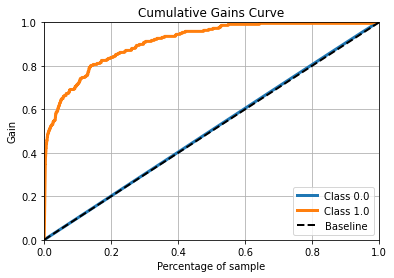

In [553]:
sk.metrics.plot_cumulative_gain(y_test_7244_selected_feature, logreg.predict_proba(X_test_7244_selected_feature))
plt.show()

Plotting Plotting Cumulative Lift Curve

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

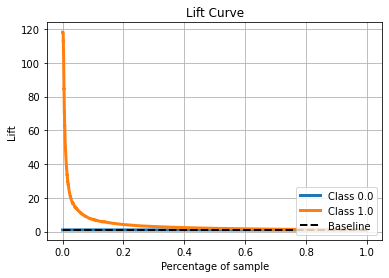

In [554]:
sk.metrics.plot_lift_curve(y_test_7244_selected_feature, logreg.predict_proba(X_test_7244_selected_feature))

### Getting metrics for predictions

In [555]:
import kds
y_prob = logreg.predict_proba(X_test_7244_selected_feature)
metrics = kds.metrics.decile_table(y_test_7244_selected_feature, y_prob[:,1])
metrics.to_csv(r'./metrics1.csv')

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

In [556]:
X_test_7362 = processed_table_7362[selectedFeatures]

### Predicting for 7362 campaign

In [557]:
Y_pred_7362 = logreg.predict_proba(X_test_7362)

In [558]:
Y_pred_7362_predict = logreg.predict(X_test_7362)

In [559]:
Y_pred_7362_predict.sum()

1047.0

In [560]:
processed_table_7362['prob_will_contribute'] = Y_pred_7362.tolist()

In [561]:
processed_table_7362.head()

,donorID,province,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,Q3_Donations,...,Q4_Amount,Q1_Min,Q2_Min,Q3_Min,Q4_Min,age,age-group,amount,has_contributed,prob_will_contribute
0,100001,4,1,0,2,0.046414,0.000043,0.015038,0.019231,0.000000,...,0.000026,0.003046,2.475000e-06,0.000239,0.000003,0.292453,0.3,0.0,0.0,"[0.8967502805672343, 0.10324971943276569]"
1,100003,4,1,1,2,0.046414,0.000010,0.015038,0.019231,0.027586,...,0.000002,0.001170,9.750000e-07,0.000091,0.000002,0.113208,0.1,0.0,0.0,"[0.9994487661891945, 0.0005512338108055048]"
2,100004,2,0,0,1,0.105485,0.000178,0.052632,0.028846,0.020690,...,0.000114,0.007671,6.172500e-06,0.000818,0.000010,0.433962,0.4,0.0,0.0,"[0.9081496295030368, 0.09185037049696324]"
3,100006,2,0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000158,0.000000,0.679245,0.7,0.0,0.0,"[0.9963099831322862, 0.00369001686771377]"
4,100009,2,0,1,1,0.075949,0.000080,0.030075,0.028846,0.020690,...,0.000034,0.003793,2.475000e-06,0.000658,0.000003,0.622642,0.6,0.0,0.0,"[0.9658659004735364, 0.03413409952646363]"


In [562]:
processed_table_7362_duplicate = pd.read_csv('./data/tables/processed_table_7362_without_encoding.csv')

In [563]:
df = pd.DataFrame(Y_pred_7362)

In [564]:
processed_table_7362_duplicate['prob_will_contribute'] = df[1]

In [565]:
processed_table_7362_duplicate['prob_will_contribute']

0        0.103250
1        0.000551
2        0.091850
3        0.003690
4        0.034134
           ...   
26517    0.003214
26518    0.001942
26519    0.000753
26520    0.004225
26521    0.002141
Name: prob_will_contribute, Length: 26522, dtype: float64

# Analyzing Potential Donor Profile


Potential Donors Based on Region

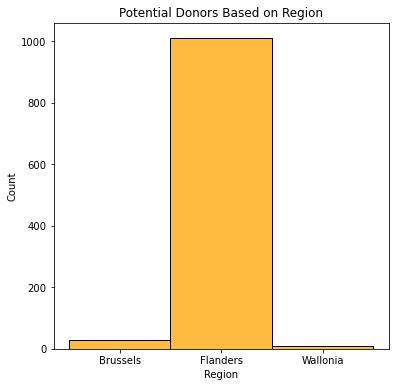

In [566]:
import seaborn as sns


fig,ax = plt.subplots()
fig.set_size_inches(6,6,forward =True)
sns.histplot(processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] > 0.5,'region'],color = 'orange')
plt.xlabel('Region')
ax.set_title('Potential Donors Based on Region')
plt.show()

Plotting Donors in terms of Age

Text(0.5, 1.0, 'Donors in terms of Age')

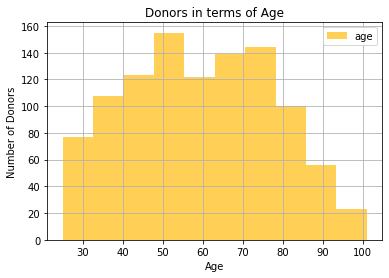

In [567]:
processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] > 0.5,'age'].hist(legend=True, color='#FFCF56')
plt.xlabel('Age')
plt.ylabel("Number of Donors");
plt.title('Donors in terms of Age')


Plotting Non-Donators in terms of Age

Text(0.5, 1.0, 'Non-Donators in terms of Age')

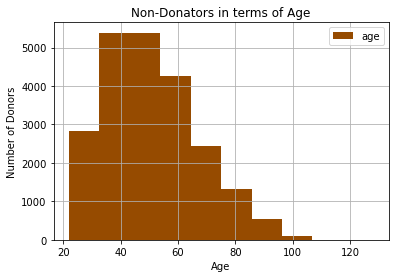

In [568]:
processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] < 0.2,'age'].hist(legend=True, color='#964B00')
plt.xlabel('Age')
plt.ylabel("Number of Donors");
plt.title('Non-Donators in terms of Age')

### Plotting gender distribution for donors and non donors

Text(0.5, 1.0, 'Donors in terms of Gender')

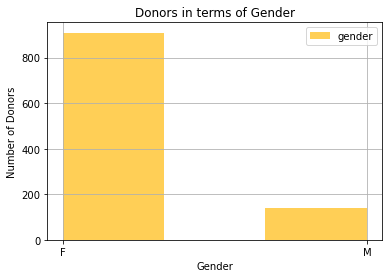

In [569]:
processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] > 0.5,'gender'].hist(legend=True, color='#FFCF56',bins=3)
plt.xlabel('Gender')
plt.ylabel("Number of Donors");
plt.title('Donors in terms of Gender')

Donors vs Number of Earlier Donations

Text(0.5, 1.0, 'Donors vs Number of Earlier Donations')

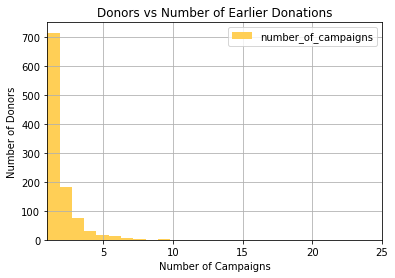

In [570]:
processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] > 0.5 ,'number_of_campaigns'].hist(legend=True, color='#FFCF56',bins=25)
plt.xlim((1, 25))
plt.xlabel('Number of Campaigns')
plt.ylabel("Number of Donors");
plt.title('Donors vs Number of Earlier Donations')

Donors vs Days since last contribution

Text(0.5, 1.0, 'Donors vs Days since last contribution')

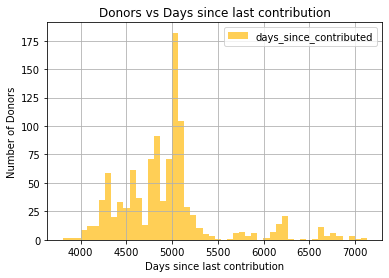

In [571]:
processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] > 0.5,'days_since_contributed'].hist(legend=True, color='#FFCF56',bins=50)
plt.xlabel('Days since last contribution')
plt.ylabel("Number of Donors");
plt.title('Donors vs Days since last contribution')

Donors in terms of Province

Text(0.5, 1.0, 'Donors in terms of Province')

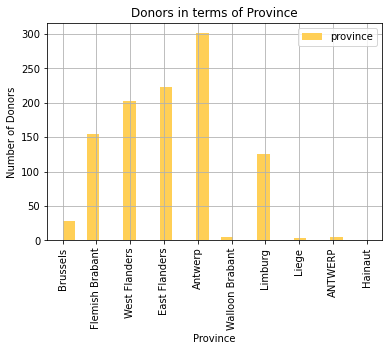

In [572]:
processed_table_7362_duplicate.loc[processed_table_7362_duplicate['prob_will_contribute'] > 0.5,'province'].hist(legend=True, color='#FFCF56',bins=25)
plt.xlabel('Province')
plt.xticks(rotation=90)
plt.ylabel("Number of Donors");
plt.title('Donors in terms of Province')

END OF EVALUATION FILE